#### 1. Analyse the data using the visualizations
#### 2. Preprocess the data by handling missing values & Outliers, if any.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

df=pd.read_csv(r"C:\Users\Parvathy Shine\Desktop\Assignments\16. KNN\KNN\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
df.info() # One object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df["type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

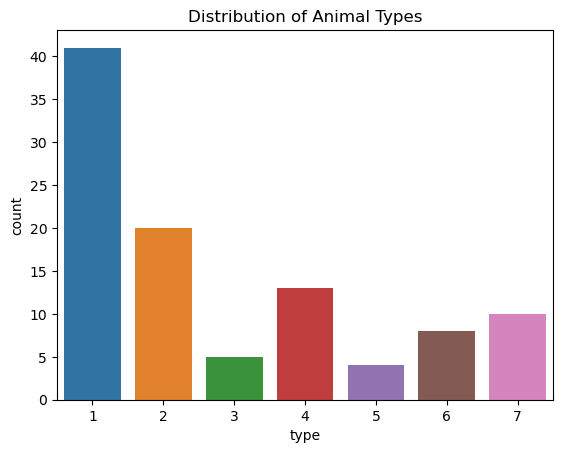

In [5]:
# Visualising the distributions of animal types

sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.show()

In [6]:
# Checking mising values :
df.isnull().sum() # no missing values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

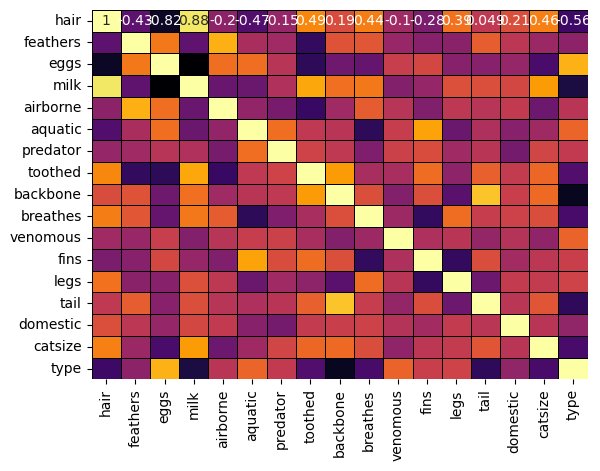

In [7]:
# Correlation Matrix
sns.heatmap(df.corr(), annot=True,  cmap="inferno", cbar=False, linewidths=0.5, linecolor='black');

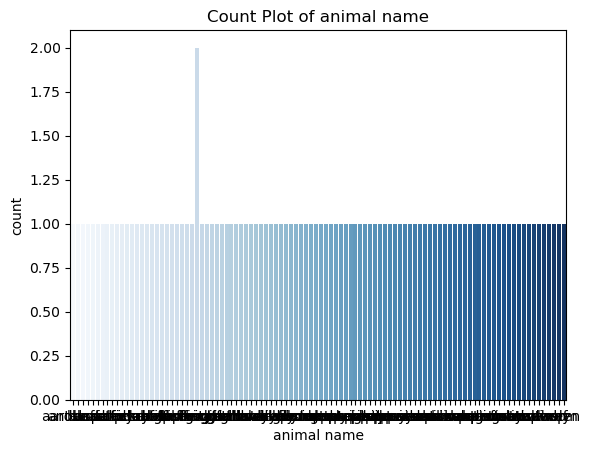

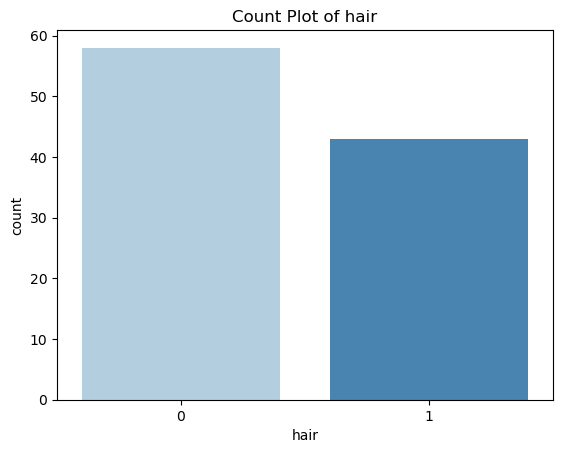

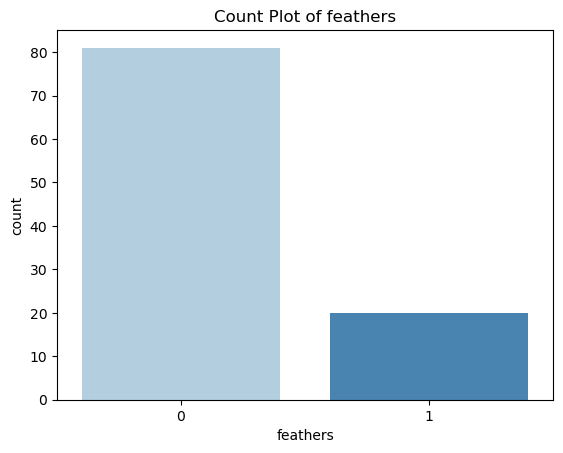

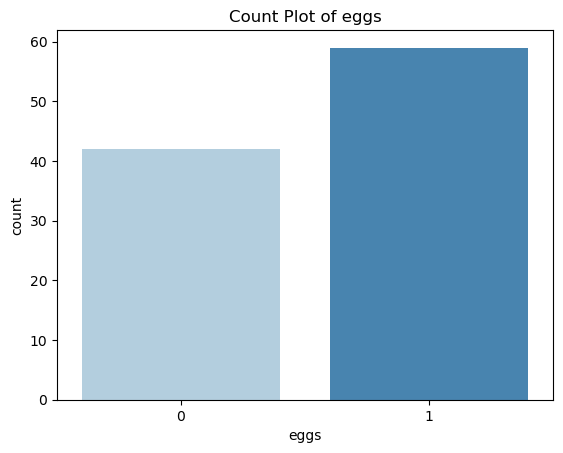

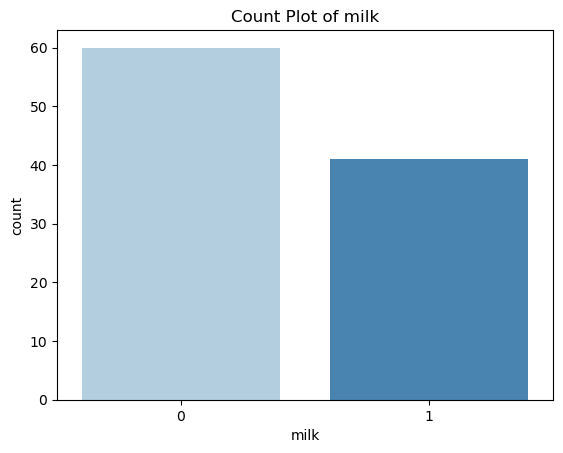

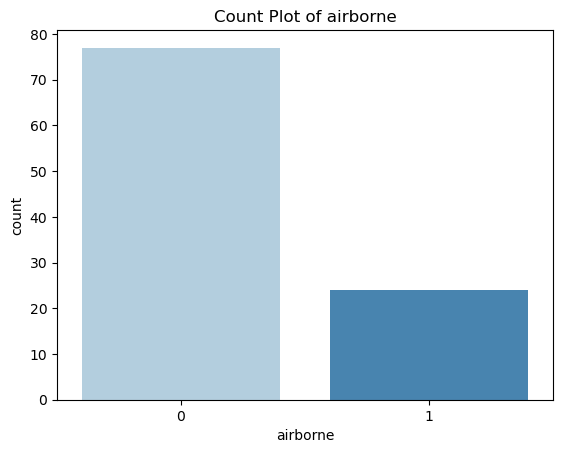

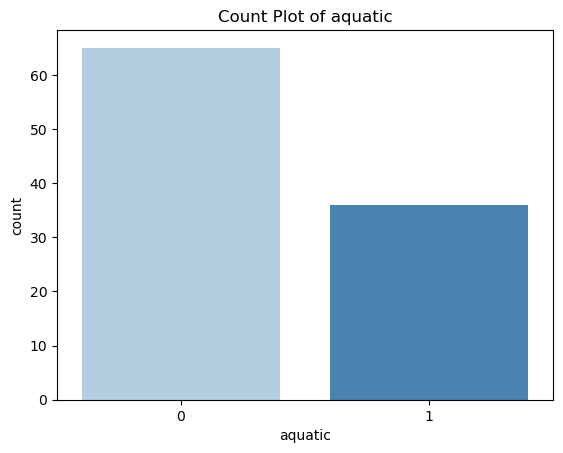

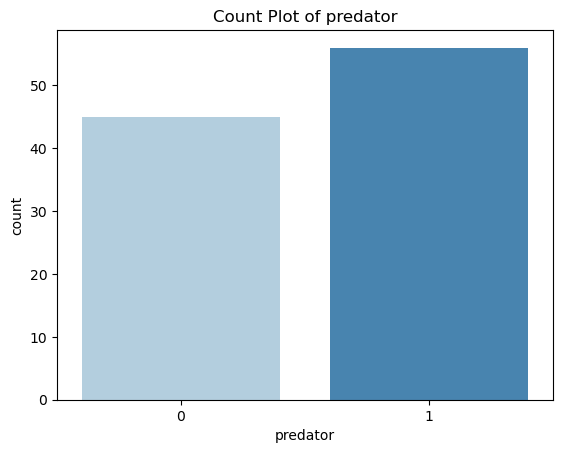

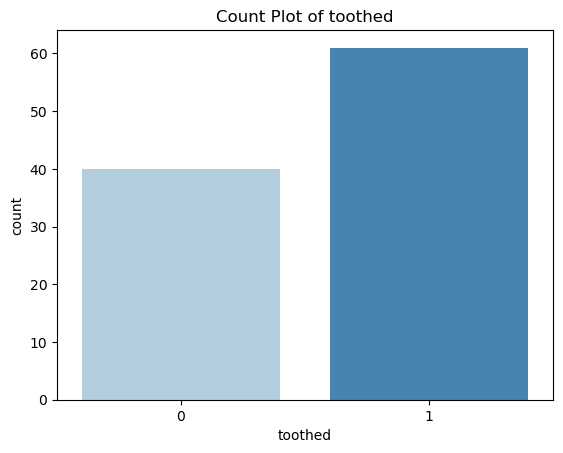

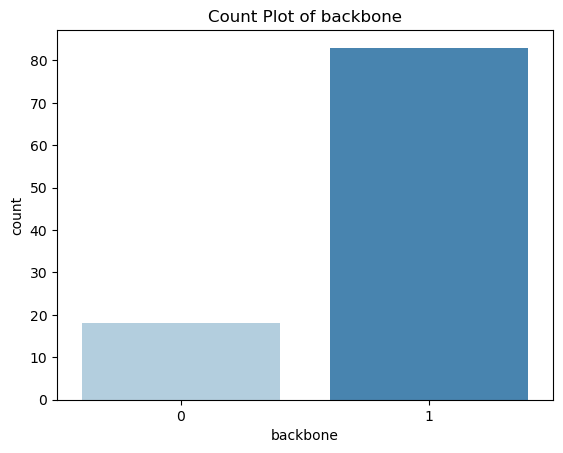

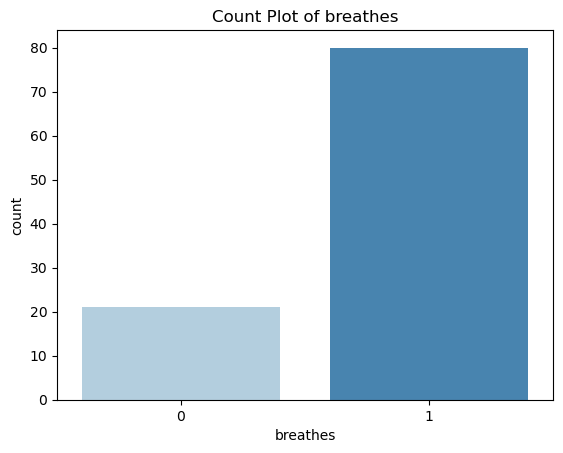

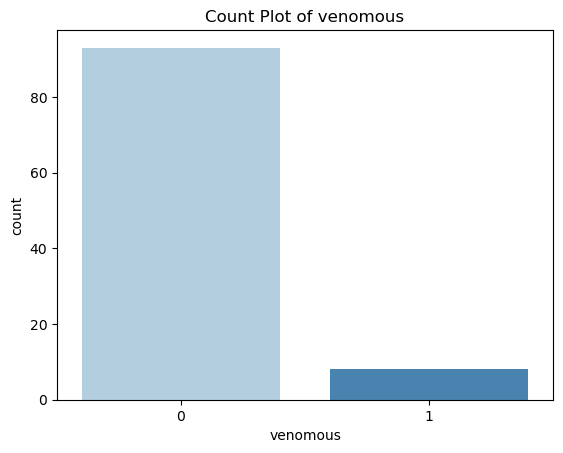

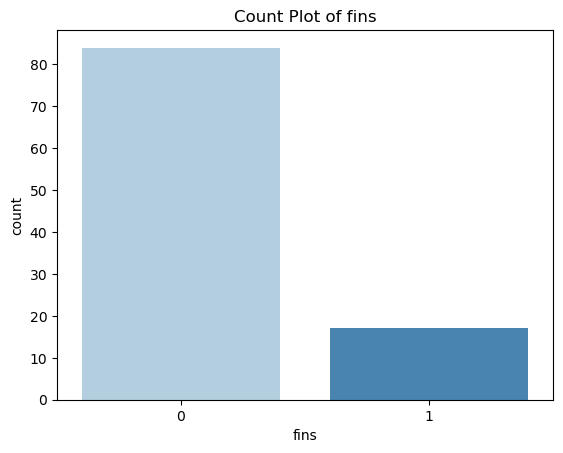

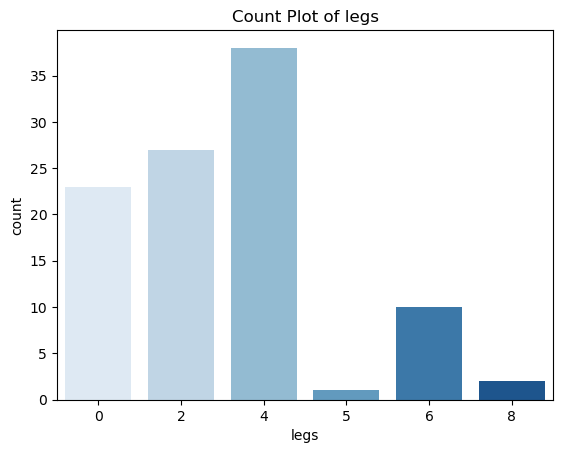

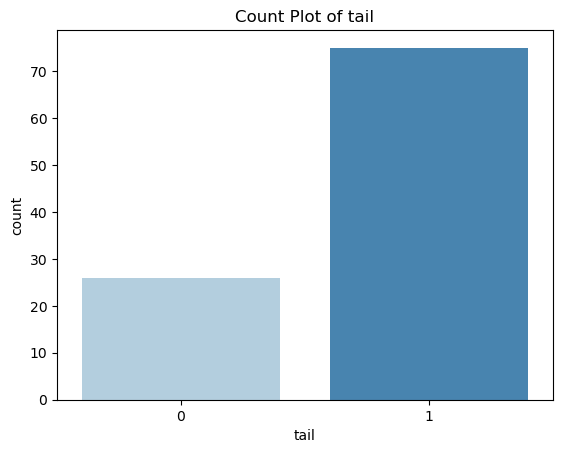

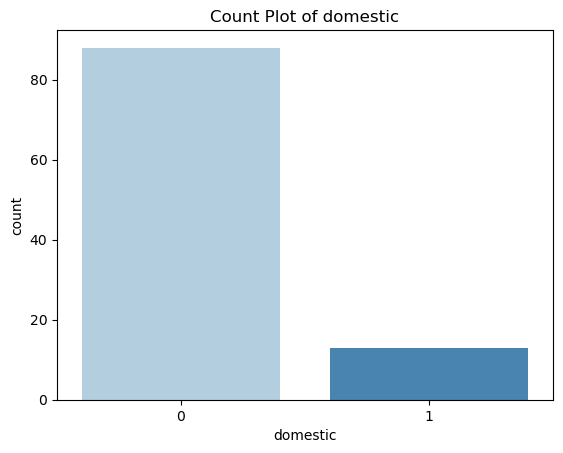

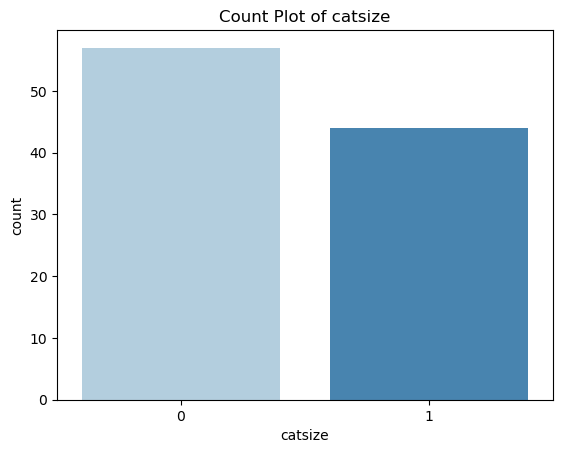

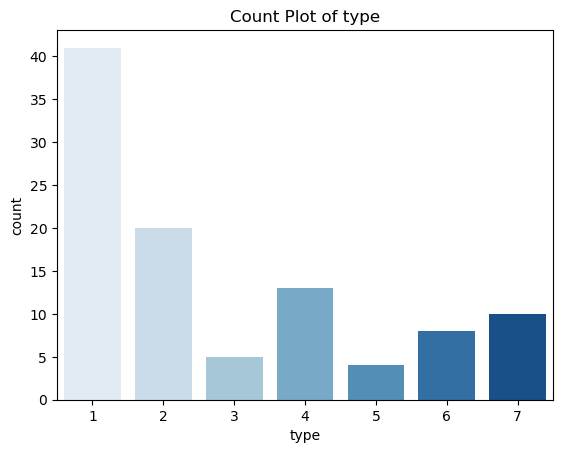

In [8]:
# Count plot for visualising each Features (numerical as well as categorcial)
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    sns.countplot(data=df, x=col, palette='Blues')
    plt.title(f'Count Plot of {col}')
    plt.show()

In [9]:
# Since we can use huge imbalance in the data . We use Smote
!pip install -U scikit-learn imbalanced-learn

In [10]:
# Using Smote to handle imbalanced data

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Original feature and target split
X = df.drop(columns=['animal name', 'type'])
y = df['type']

# Train-test split (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: 1    33
2    16
4    10
7     8
6     6
3     4
5     3
Name: type, dtype: int64
After SMOTE: 7    33
3    33
2    33
4    33
1    33
6    33
5    33
Name: type, dtype: int64


In [11]:
# Removing Outliers:

# Separating numerical columns
num_cols = df.select_dtypes(include=['number'])  

#Calculating Quantiles
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers
df2 = num_cols[~((num_cols > upper_bound) | (num_cols < lower_bound)).any(axis=1)]
df1 = df.loc[df.index] # Align using index to keep 'animal name' column

# Print the shape of the new DataFrame
print(df1.shape)

(101, 18)


In [12]:
# 4. Since we handled the imbalanced data using Smote, we have already splitted the dataset and now applying KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [13]:
# 5. Evaluvation metrix

from sklearn.metrics import classification_report, accuracy_score

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [14]:
# A perfect model

In [15]:
# Choose an appropriate distance metric and value for K.

import numpy as np
from sklearn.metrics import f1_score

k_values = range(1, 21) # Test the values in between these ranges
f1_scores = [] # Empty list that stores the F1 score

for k in k_values: # Loops through each k values
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # default metric-euclidean
    knn.fit(X_train_sm, y_train_sm)
    y_pred = knn.predict(X_test)  # predict on original test set (not SMOTE)
    f1 = f1_score(y_test, y_pred, average='weighted') # Calculate the weighted F1 scores
    f1_scores.append(f1)

optimal_k = k_values[np.argmax(f1_scores)] # Find the highest f1 score
print(f"Optimal k based on F1-score: {optimal_k}")

Optimal k based on F1-score: 1


In [16]:
# 6. Evalucate the model with optimal k
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_sm, y_train_sm)
y_pred = knn_optimal.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



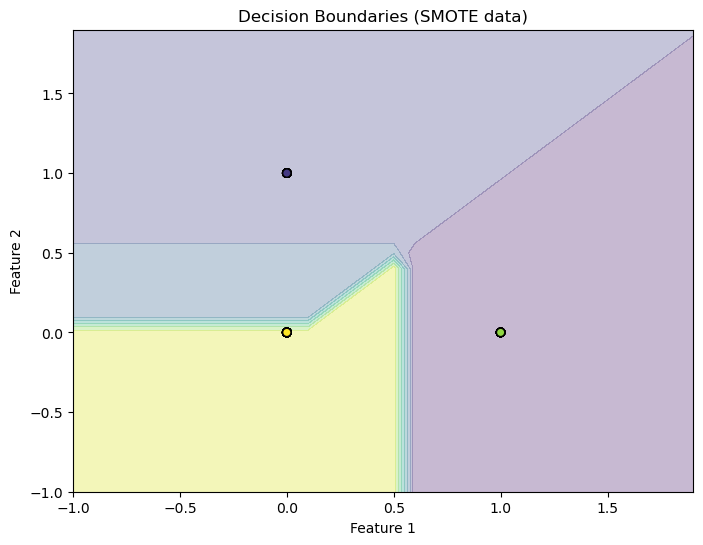

In [17]:
# 7.  Visualize decision boundaries - using 2d visualisations

import matplotlib.pyplot as plt
import numpy as np

# Select first 2 features for visualization (or use PCA)
X_train_vis = X_train_sm.iloc[:, :2].values # Selecting the first 2 Features 
y_train_vis = y_train_sm.values #.values converts the dataframe to Numpy array

knn_vis = KNeighborsClassifier(n_neighbors=optimal_k) # Create a new knn model using the previous chosen optimal k
knn_vis.fit(X_train_vis, y_train_vis) #Trains the model on the 2 selected features from the SMOTE balanced data

x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1 # Find min and max values of the 2 features to define the plot range 
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), # Creates a grid of plot over the 2D space
                     np.arange(y_min, y_max, 0.1))  # meshgrid- generate all possible coordinate combinations over the feature space

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()]) # Predicts the class label for every point in the grid , .ravel() - flattens the array into 1D before combining
Z = Z.reshape(xx.shape) # Reshapes the predicted class labels Z to match the grid shape (xx and yy) so we can plot it.

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolor='k')
plt.title("Decision Boundaries (SMOTE data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#### Info:

##### 1. Key hyperparameters in KNN?
n_neighbors (K): Number of nearest neighbors to consider when making predictions. Choosing the right K is crucial—too small leads to overfitting; too large can lead to underfitting.
<br>weights: Determines how the influence of neighbors is weighted.
<br>'uniform': all neighbors contribute equally (default).
<br>'distance': closer neighbors have a higher influence.
<br>metric: The distance function used to measure similarity (default is 'minkowski').
<br>algorithm: The algorithm used to compute nearest neighbors:

##### 2. Distance metrics used in KNN.
Euclidean Distance (p=2 in Minkowski): Standard straight-line distance between points. Suitable for continuous features.
<br>Manhattan Distance (p=1 in Minkowski): Sum of absolute differences. More robust to outliers.
<br>Minkowski Distance: Generalized form that includes both Euclidean and Manhattan.
<br>Chebyshev Distance: Maximum absolute difference across dimensions.
<br>Cosine Similarity: Measures the cosine of the angle between vectors—useful for text and high-dimensional data.
<br>Hamming Distance: Counts differing bits or characters—used for categorical or binary features.